In [77]:
import sys
import sklearn
import numpy as np
import os
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sn
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [78]:
csv_file1 = "C:/Users/rodri/Desktop/NCFS2/ML/project/data/transactions.csv"
trans = pd.read_csv(csv_file1,sep=',',encoding='latin-1')

csv_file2 = "C:/Users/rodri/Desktop/NCFS2/ML/project/data/final_data.csv"
RFM = pd.read_csv(csv_file2,sep=',',encoding='latin-1')


In [79]:
trans.head()

,customer_id,Trans_date,Trans_time,Trans_tot_amount,merchant_id,Online_payment,Merch_loc_X,Merch_loc_Y,Spending_enc,Trans_type_AV,Trans_type_nan,Trans_currency_AMERIKAN_DOLARI,Trans_currency_EURO,Trans_currency_TURK_LIRASI
0,11861396,23OCT2014:00:00:00,21:01:13,10.57,999999,0,NaN,NaN,23,1.0,0.0,0.0,0.0,1.0
1,13667756,12APR2015:00:00:00,15:18:50,82.00,999999,0,NaN,NaN,23,1.0,0.0,0.0,0.0,1.0
2,11024865,23JUL2014:00:00:00,21:12:12,15.00,999999,0,NaN,NaN,23,1.0,0.0,0.0,0.0,1.0
3,10922788,06AUG2014:00:00:00,21:54:49,86.00,999999,0,NaN,NaN,23,1.0,0.0,0.0,0.0,1.0
4,10335987,12APR2015:00:00:00,19:10:09,30.00,999999,0,NaN,NaN,23,1.0,0.0,0.0,0.0,1.0


In [80]:
trans['Spending_enc']=np.where(trans['Spending_enc']==10,1, 0)

In [81]:
trans = trans.dropna()

In [82]:
RFM = RFM.dropna()

In [87]:
RFM.head()

,MUSTERI_ID_MASK,NextPurchaseDay,Recency,Recency_scaled,RecencyCluster,Frequency,Frequency_scaled,FrequencyCluster,Monetary,Monetary_scaled,MonetaryCluster,OverallScore,Segment,DayDiff,DayDiff2,DayDiff3,DayDiffMean,DayDiffStd
0,11861396,168.0,3,0.016393,3,61,0.021231,1,3211.81,0.003102,0,4,Mid-Value,1.0,2.0,3.0,2.617647,3.084808
1,3859074,1.0,0,0.000000,3,78,0.027247,1,12708.27,0.012275,0,4,Mid-Value,1.0,2.0,3.0,5.352941,8.142229
2,11099890,11.0,1,0.005464,3,111,0.038924,1,3042.17,0.002938,0,4,Mid-Value,1.0,5.0,8.0,2.686567,2.499751
3,20674498,21.0,5,0.027322,3,81,0.028309,1,5937.02,0.005735,0,4,Mid-Value,1.0,3.0,6.0,3.933333,8.611303
4,5797036,17.0,0,0.000000,3,51,0.017693,1,6336.99,0.006121,0,4,Mid-Value,1.0,5.0,8.0,5.851852,7.896950


In [89]:
ND = RFM[['NextPurchaseDayRange','MUSTERI_ID_MASK']]

In [90]:
ND.head()

,NextPurchaseDayRange,MUSTERI_ID_MASK
0,1,11861396
1,0,3859074
2,1,11099890
3,1,20674498
4,1,5797036


In [88]:
RFM['NextPurchaseDayRange']=np.where(RFM['NextPurchaseDay'] >7,1, 0)

In [121]:
RFM = RFM[['NextPurchaseDayRange','Segment']]

In [122]:
RFM = pd.get_dummies(RFM)

In [123]:
RFM.head()

,NextPurchaseDayRange,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,1,0,0,1
1,0,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1


In [91]:
df = trans.merge(ND,left_on='customer_id',right_on='MUSTERI_ID_MASK',how='left')

In [93]:
df = df.drop(['customer_id','MUSTERI_ID_MASK'],axis=1)

In [10]:
df = trans[['customer_id','Spending_enc']].merge(RFM,left_on='customer_id',right_on='MUSTERI_ID_MASK',how='left')
df = df.drop(['customer_id','MUSTERI_ID_MASK','NextPurchaseDay'],axis=1)

In [12]:
df = df.dropna()

In [13]:
df.isnull().any()

Spending_enc            False
Recency                 False
Recency_scaled          False
RecencyCluster          False
Frequency               False
Frequency_scaled        False
FrequencyCluster        False
Monetary                False
Monetary_scaled         False
MonetaryCluster         False
OverallScore            False
DayDiff                 False
DayDiff2                False
DayDiff3                False
DayDiffMean             False
DayDiffStd              False
NextPurchaseDayRange    False
Segment_High-Value      False
Segment_Low-Value       False
Segment_Mid-Value       False
dtype: bool

In [94]:
df.head()

,Trans_date,Trans_time,Trans_tot_amount,merchant_id,Online_payment,Merch_loc_X,Merch_loc_Y,Spending_enc,Trans_type_AV,Trans_type_nan,Trans_currency_AMERIKAN_DOLARI,Trans_currency_EURO,Trans_currency_TURK_LIRASI,NextPurchaseDayRange
0,14FEB2015:00:00:00,13:09:13,20.0,27447333,0,40.98648,28.78267,0,1.0,0.0,0.0,0.0,1.0,1.0
1,07NOV2014:00:00:00,13:48:10,390.0,27447333,0,40.98648,28.78267,0,1.0,0.0,0.0,0.0,1.0,0.0
2,05MAY2015:00:00:00,17:03:02,285.0,27447333,0,40.98648,28.78267,0,1.0,0.0,0.0,0.0,1.0,0.0
3,23DEC2014:00:00:00,13:37:10,150.0,27447333,0,40.98648,28.78267,0,1.0,0.0,0.0,0.0,1.0,0.0
4,23DEC2014:00:00:00,13:36:14,465.0,27447333,0,40.98648,28.78267,0,1.0,0.0,0.0,0.0,1.0,0.0


# Training to guess cat

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Spending_enc'], axis=1),df['Spending_enc'], test_size=.20, random_state=826)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

NameError: name 'df' is not defined

In [15]:
from sklearn.tree import DecisionTreeClassifier

X = X_train
y = y_train.values.reshape(-1, 1)

tree_clf = DecisionTreeClassifier(min_samples_leaf=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(min_samples_leaf=2, random_state=42)

In [16]:
pred = tree_clf.predict(X_test)

In [17]:
np.unique(pred)

array([0, 1])

In [18]:
accuracy_score(y_test, pred)

0.7587859086849601

In [19]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=3)


In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[1752112,  209150],
       [ 479520,  394322]], dtype=int64)

In [21]:
precision_score(y_train, y_train_pred)

0.6534221968873453

In [22]:
recall_score(y_train, y_train_pred)

0.4512509126363805

In [23]:
f1_score(y_train, y_train_pred)

0.5338364085089562

In [26]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

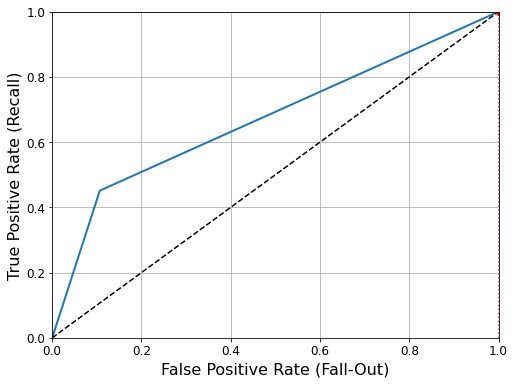

In [27]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown                               # Not shown
plt.show()

In [134]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=202, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=202, random_state=42)

In [135]:
y_pred = forest_clf.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

In [ ]:
confusion_matrix(y_train, y_train_pred)

In [ ]:
precision_score(y_train, y_train_pred)

In [ ]:
recall_score(y_train, y_train_pred)

In [ ]:
f1_score(y_train, y_train_pred)

In [ ]:
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown                               # Not shown
plt.show()

# 7 days training

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(RFM.drop(['NextPurchaseDayRange'], axis=1),RFM['NextPurchaseDayRange'], test_size=.20, random_state=826)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

63357
15840
63357
15840


# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
X = X_train
y = y_train.values.reshape(-1, 1)

tree_clf = DecisionTreeClassifier(min_samples_leaf=7, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=7, random_state=42)

In [61]:
pred = tree_clf.predict(X_train)
accuracy_score(y_train, pred)

0.7374875704342062

In [62]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=3)

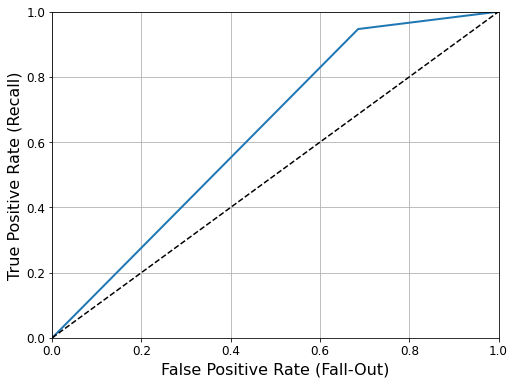

In [63]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
          # Not shown  
plt.savefig('roc_tree.png')                               # Not shown
plt.show()


In [64]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,y_train_pred)

0.6306571993852639

In [65]:
cfmat = confusion_matrix(y_train, y_train_pred)

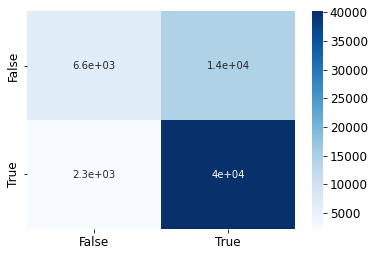

In [66]:
ax = sn.heatmap(cfmat, annot=True, cmap='Blues')


## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig('confmat_tree.png')
plt.show()


In [67]:
precision_score(y_train, y_train_pred)

0.7363022496238394

In [68]:
recall_score(y_train, y_train_pred)

0.9466594319146928

In [45]:
param_distribs = {
        'min_samples_leaf': randint(low=1, high=10),
        
    }

forest_clf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(tree_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy',refit='recall' ,random_state=42)
rnd_search.fit(X_train, y_train)

NameError: name 'randint' is not defined

In [46]:
rnd_search.best_estimator_

NameError: name 'rnd_search' is not defined

# Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(max_depth=5,
                       n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [70]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.7374876652276514

train

In [71]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

In [72]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)         

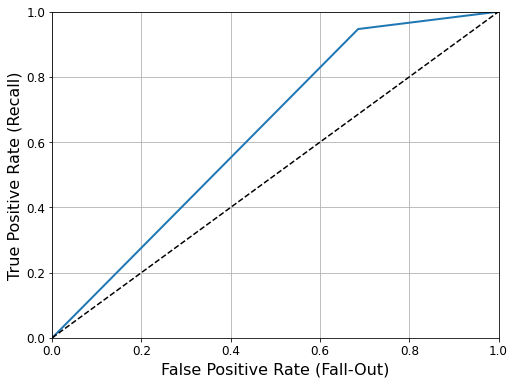

In [73]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
          # Not shown                                 # Not shown
plt.savefig('roc.png')
plt.show()


In [74]:
roc_auc_score(y_train,y_train_pred)

0.6306571993852639

In [52]:
from sklearn.metrics import confusion_matrix
cfmat = confusion_matrix(y_train, y_train_pred)

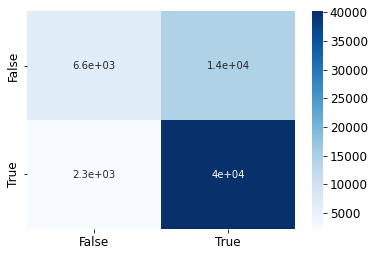

In [53]:
ax = sn.heatmap(cfmat, annot=True, cmap='Blues')


## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig('confmat.png')
plt.show()


In [54]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train, y_train_pred)

0.7363022496238394

In [55]:
recall_score(y_train,  y_train_pred)

0.9466594319146928

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_depth': randint(low=1, high=10)
    }

forest_clf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(forest_clf, param_distributions=param_distribs,
                                n_iter=20, cv=5, scoring='accuracy',refit='recall' ,random_state=42)
rnd_search.fit(X_train, y_train)

In [32]:
rnd_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=103, random_state=42)

In [127]:
pred = forest_clf.predict(X_test)
accuracy_score(y_test, pred)

0.7386363636363636

In [97]:
df.head()

,Trans_date,Trans_time,Trans_tot_amount,merchant_id,Online_payment,Merch_loc_X,Merch_loc_Y,Spending_enc,Trans_type_AV,Trans_type_nan,Trans_currency_AMERIKAN_DOLARI,Trans_currency_EURO,Trans_currency_TURK_LIRASI,NextPurchaseDayRange
0,14FEB2015:00:00:00,13:09:13,20.0,27447333,0,40.98648,28.78267,0,1.0,0.0,0.0,0.0,1.0,1.0
1,07NOV2014:00:00:00,13:48:10,390.0,27447333,0,40.98648,28.78267,0,1.0,0.0,0.0,0.0,1.0,0.0
2,05MAY2015:00:00:00,17:03:02,285.0,27447333,0,40.98648,28.78267,0,1.0,0.0,0.0,0.0,1.0,0.0
3,23DEC2014:00:00:00,13:37:10,150.0,27447333,0,40.98648,28.78267,0,1.0,0.0,0.0,0.0,1.0,0.0
4,23DEC2014:00:00:00,13:36:14,465.0,27447333,0,40.98648,28.78267,0,1.0,0.0,0.0,0.0,1.0,0.0


In [106]:
df = df.drop(['Trans_time'],axis=1)

In [112]:
df= df.dropna()

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['NextPurchaseDayRange'], axis=1),df['NextPurchaseDayRange'], test_size=.20, random_state=826)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

2835104
708777
2835104
708777


In [114]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(max_depth=5,
                       n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [116]:
pred = forest_clf.predict(X_test)
accuracy_score(y_test, pred)

0.6080431503843945

# Support Vector Machine

In [187]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores= cross_val_predict(svm_clf, X_train, y_train, cv=3)


In [188]:
precision_score(y_train, svm_scores)

0.7363022496238394

In [182]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
#xgb_clf=XGBClassifier( X_train, y_train)
xgscore = cross_val_predict(XGBClassifier(), X_train, y_train, cv=3)

In [183]:
precision_score(y_train , xgscore)

0.7363022496238394